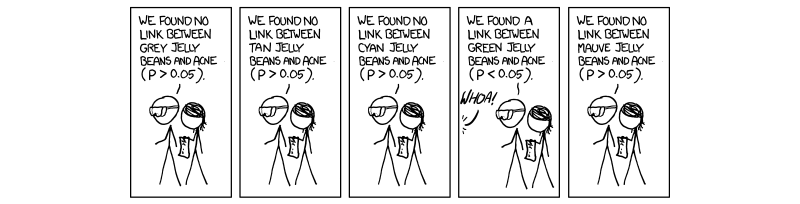

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

<h1>S07T01: Hipotesis Testing</h1>

**The dataset used in this notebook can be found in Kaggle. Use the below link to access it**


<a href="https://www.kaggle.com/varpit94/football-teams-rankings-stats">Football teams | Rankings | Stats</a>

Each row contains information for a team. The data shows following statistics for each team:

**Team** - Name of team <br>
**Tournament** - Name of tournament <br>
**Goals** - Number of goals scored in the tournament in year 2020-2021 <br>
**Shots pg** - Number of shots per game <br>
**Yellow_cards** - Number of yellow cards given in the tournament in year 2020-2021 <br>
**Red_cards** - Number of red cards given in the tournament in year 2020-2021 <br>
**Possession%** - Percentage of possession <br>
**Pass%** - Percentage of passes <br>
**Aerials won** - Aerial duels won per game. Aerial duels occur when two players contest a ball in the air; this is a symmetrical event because neither player starts with possession. <br>
**Rating** - Overall rating of the team <br>


<h2>Level 1</h2>

<h3>DEA</h3>

**Take a sports-themed data set and select an attribute from the data set. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.**

In [2]:
df = pd.read_csv("Football teams.csv")

In [3]:
df.sample(10)

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
70,Udinese,Serie A,42,10.9,63,2,47.2,82.5,13.1,6.55
19,Inter,Serie A,89,14.5,59,2,52.0,87.0,11.8,6.80
57,Freiburg,Bundesliga,52,11.4,63,0,47.5,78.1,17.5,6.60
8,Borussia Dortmund,Bundesliga,75,14.6,43,1,57.5,85.5,12.8,6.84
35,Sassuolo,Serie A,64,13.9,74,4,58.2,87.8,10.9,6.67
20,Lyon,Ligue 1,81,16.1,60,10,53.6,84.7,14.3,6.80
40,Real Betis,LaLiga,50,11.7,87,8,52.9,82.0,16.4,6.64
89,Elche,LaLiga,34,7.1,95,3,48.1,81.5,13.2,6.48
54,Union Berlin,Bundesliga,50,11.7,55,2,45.9,76.2,17.6,6.62
71,SD Huesca,LaLiga,34,10.7,68,2,48.7,79.8,15.7,6.55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          98 non-null     object 
 1   Tournament    98 non-null     object 
 2   Goals         98 non-null     int64  
 3   Shots pg      98 non-null     float64
 4   yellow_cards  98 non-null     int64  
 5   red_cards     98 non-null     int64  
 6   Possession%   98 non-null     float64
 7   Pass%         98 non-null     float64
 8   AerialsWon    98 non-null     float64
 9   Rating        98 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.8+ KB


In [5]:
df.isnull().sum()

Team            0
Tournament      0
Goals           0
Shots pg        0
yellow_cards    0
red_cards       0
Possession%     0
Pass%           0
AerialsWon      0
Rating          0
dtype: int64

<h3>Exercise 1</h3>

**Null Hypotesis:** <br>
Data = Gaussian Distribution

**Alternative Hypotesis:** <br>
Data != Gaussian Distribution


Text(0.5, 1.0, 'Distribution')

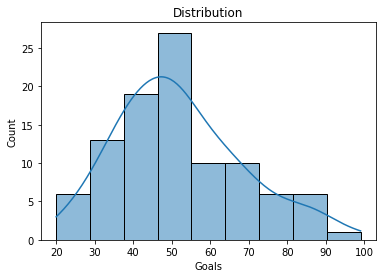

In [6]:
fig = sns.histplot(data=df, x="Goals", kde=True)
fig.set_title("Distribution")

The curve tend to the left, the histogram show that the data doesn't have a normal distribution, I decide to do another test to verify.

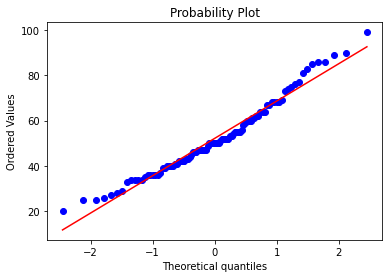

In [7]:
stats.probplot(df.Goals,plot=plt)
plt.show()

The QQ plot show that many of the data doesn't lie on the line, so graphically doesn´t look like a normal distributed data. The next step is to check the P-value.

In [8]:
stat_1, p_1 = stats.shapiro(df.Goals)

The Shapiro Wilk test is the most popular test for testing the type of normal distribution, designed specifically for this type of distribution, making it the most powerful.

In [9]:
print('stat={}, p={}'.format(stat_1, p_1))

stat=0.9694478511810303, p=0.022059809416532516


In [10]:
if p_1 > 0.05:
    print('Gaussian Distribution')
else:
    print('Not Gaussian Distribution')

Not Gaussian Distribution


The p-value is less than alpha=0.05, so the null hypothesis is rejected by means of graphical methods it can be seen that the data doesn't have a normal distributions and statistically it is proved.

<h2>Level 2</h2>

<h3>Exercise 2</h3>

**Select two other attributes from the data set and calculate the p-values and say whether they reject the null hypothesis by taking an alpha of 5%.**

**Null Hypotesis:** <br>
Data = Attributes Correlated 

**Alternative Hypotesis:** <br>
Data != Attributes Not Correlated 



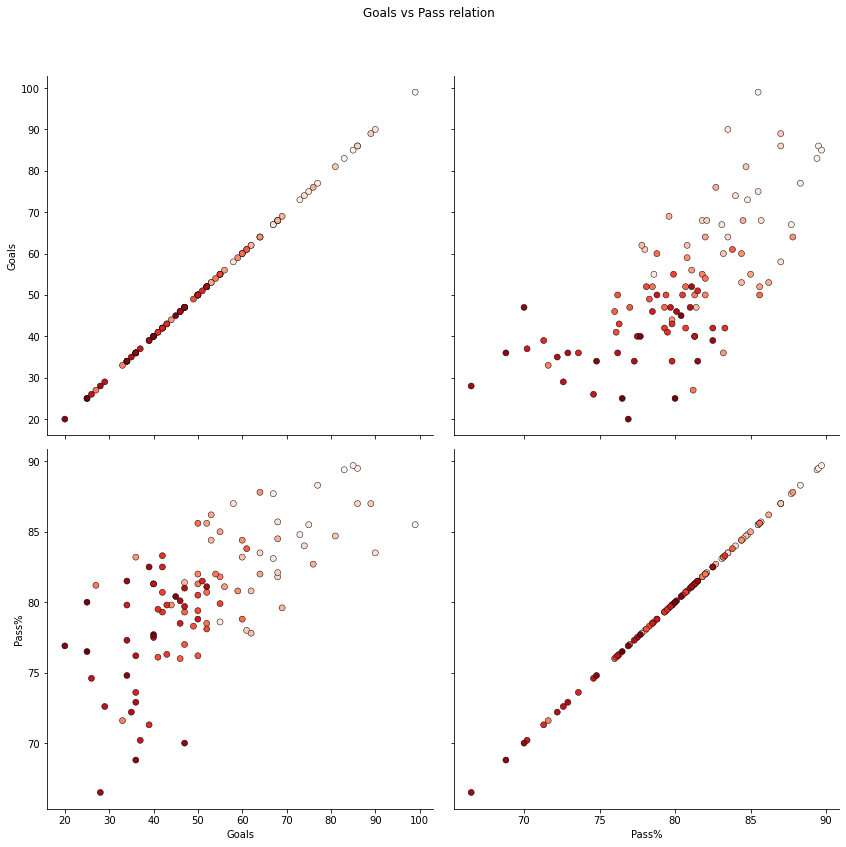

In [11]:
#A scatterplot is a type of data display that shows the relationship between 
#two numerical variables, using Seaborn with  a PairGrid of the two attributes, 
#each row and column is assigned to a different variable, so the resulting plot shows 
#each pairwise relationship of them.

g = sns.PairGrid(df, vars=["Goals", "Pass%"], hue="Team",palette="Reds",height=6)
g.map(sns.scatterplot, edgecolor="black")
g.fig.suptitle("Goals vs Pass relation")
g.fig.subplots_adjust(top=0.9)


The graph tells us that the attributes are related but we will need to know which test we can perform. The first step is look if the data is independent and identically distributed in each attributes.

<AxesSubplot:xlabel='Pass%', ylabel='Count'>

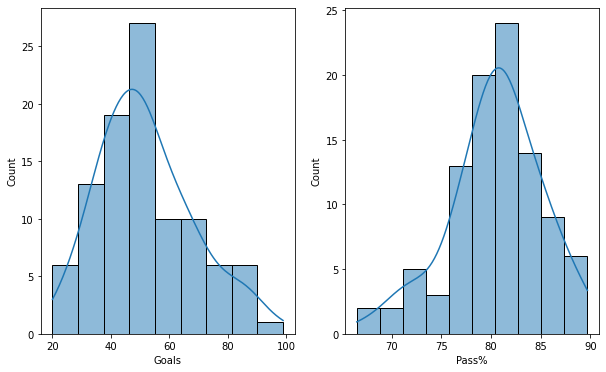

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

sns.histplot(df.Goals, kde=True, ax=ax[0])
sns.histplot(df["Pass%"], kde=True, ax=ax[1])


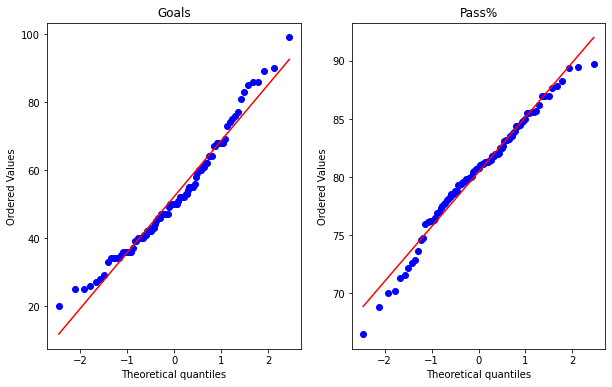

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
stats.probplot(df.Goals,plot=ax[0])
ax[0].set_title('Goals')
stats.probplot(df["Pass%"],plot=ax[1])
ax[1].set_title("Pass%")
plt.show()

The aboves plots shows us graphically that data is not independent and identically distributed. The Spearman and Kendall test can be used, I will choose the Spearman.

In [14]:
list_attributes_2 = ["Goals","Pass%"]

In [15]:
 for i in list_attributes_2:
        stat, p = stats.shapiro(df[i])
        print(i,"Stat: ",stat,"P: ",p)
        if p > 0.05:
            print('Gaussian Distribution')
        else:
            print('Not Gaussian Distribution')
        

Goals Stat:  0.9694478511810303 P:  0.022059809416532516
Not Gaussian Distribution
Pass% Stat:  0.9779809713363647 P:  0.09901624172925949
Gaussian Distribution


The only attribute that have a normal distribution is percentage of pass so I choose to perform the Spearman.

In [16]:
r_spearman_2, p_spearman_2 = stats.spearmanr(df.Goals,df["Pass%"])

In [17]:
print('r={}, p={}'.format(r_spearman_2, p_spearman_2))

r=0.7028792138943519, p=7.177527919771467e-16


In [18]:
if p_spearman_2 > 0.05:
    print('Attributes Not Correlated')
else:
    print('Attributes Correlated')

Attributes Correlated


The test show that both attributes have a monotonic relationship with more passed the goals increase, of course, the percentage of pass are global and not to goal. 

<h2>Level 3</h2>

<h3>Exercise 3</h3>

**Select three attributes from the data set and Calculate the p-value and say whether it rejects the null hypothesis taking an alpha of 5%.**

**Null Hypotesis:** <br>
Data = Attributes Correlated 

**Alternative Hypotesis:** <br>
Data != Attributes Not Correlated

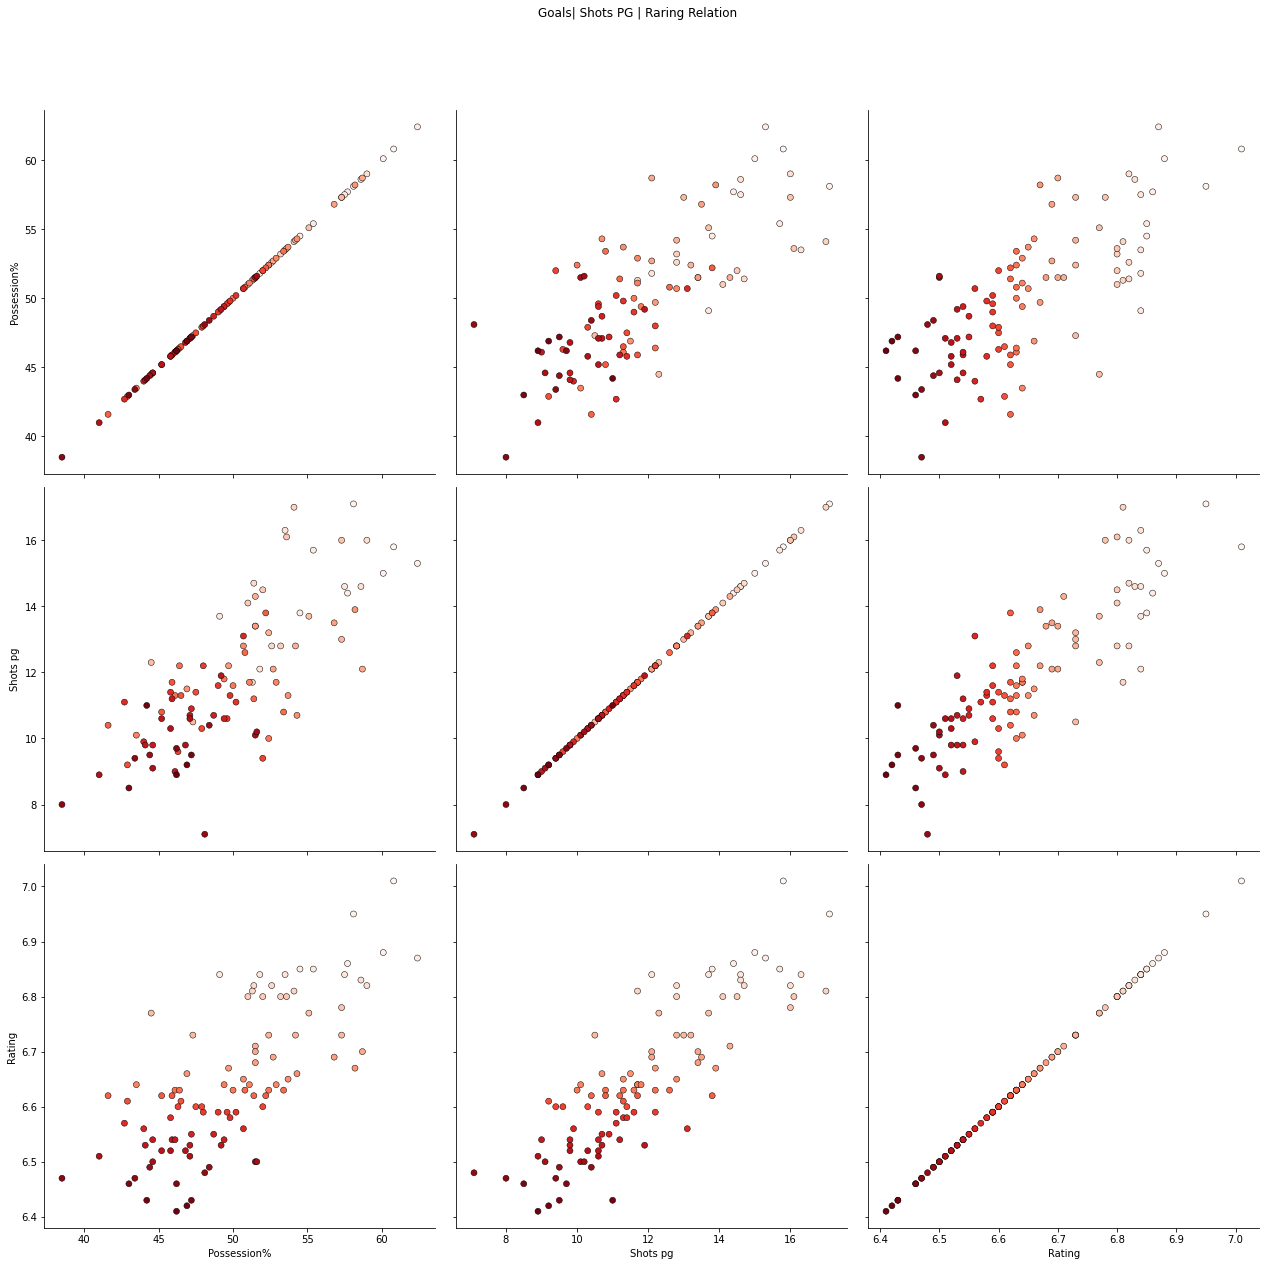

In [19]:
g = sns.PairGrid(df, vars=["Possession%", "Shots pg","Rating"], hue="Team",palette="Reds",height=6)
g.map(sns.scatterplot, edgecolor="black")
g.fig.suptitle("Goals| Shots PG | Raring Relation")
g.fig.subplots_adjust(top=0.9)

The attributes shows linearity I will procede to test the distribution.

<AxesSubplot:xlabel='Rating', ylabel='Count'>

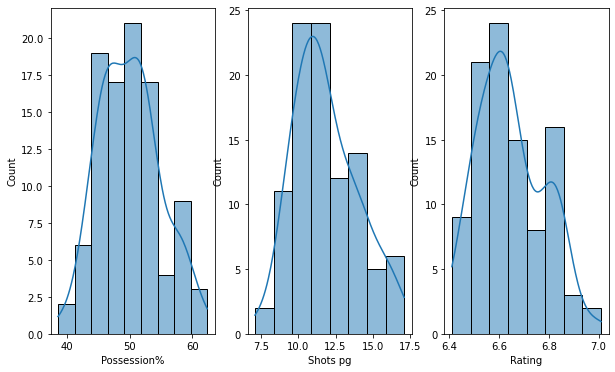

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

sns.histplot(df["Possession%"], kde=True, ax=ax[0])
sns.histplot(df["Shots pg"], kde=True, ax=ax[1])
sns.histplot(df["Rating"], kde=True, ax=ax[2])

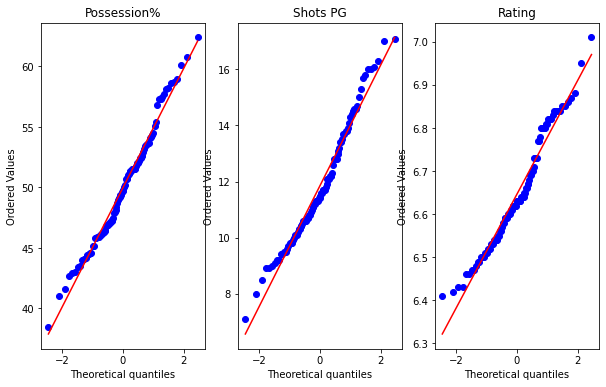

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
stats.probplot(df["Possession%"],plot=ax[0])
ax[0].set_title("Possession%")
stats.probplot(df["Shots pg"],plot=ax[1])
ax[1].set_title("Shots PG")
stats.probplot(df["Rating"],plot=ax[2])
ax[2].set_title("Rating")
plt.show()

In [22]:
list_attributes_3 = ["Possession%", "Shots pg","Rating"]
for i in list_attributes_3:
        stat, p = stats.shapiro(df[i])
        print(i,"Stat: ",stat,"P: ",p)
        if p > 0.05:
            print('Gaussian Distribution')
        else:
            print('Not Gaussian Distribution')
        

Possession% Stat:  0.9843649864196777 P:  0.29858914017677307
Gaussian Distribution
Shots pg Stat:  0.9710695743560791 P:  0.02923947386443615
Not Gaussian Distribution
Rating Stat:  0.9653318524360657 P:  0.01092368084937334
Not Gaussian Distribution


Two of three variables doesn't have normal distribution so isn't considered as a Gauissian  Distribution as a whole.

In [23]:
three_attributes = df[["Possession%", "Shots pg","Rating"]]

In [24]:
#with the subset of the desired attributes and with help of Stats we can perform the test
r_spearman_3, p_spearman_3 = stats.spearmanr(three_attributes,axis=0)

In [25]:
#The result is a correlation matrix of P-Value
p_spearman_3

array([[0.00000000e+00, 1.95864100e-18, 7.92706370e-18],
       [1.95864100e-18, 0.00000000e+00, 2.08183465e-28],
       [7.92706370e-18, 2.08183465e-28, 0.00000000e+00]])

In [26]:
#and r Value
r_spearman_3

array([[1.        , 0.74303253, 0.73414676],
       [0.74303253, 1.        , 0.84950572],
       [0.73414676, 0.84950572, 1.        ]])

In [27]:
#I will convert the array in a DF, just for better visuals
p_spearman_3_df = pd.DataFrame(p_spearman_3,columns=["Possession%", "Shots pg","Rating"])
p_spearman_3_df.rename(index={0: "Possession%", 1: "Shots pg", 2:"Rating"},inplace=True)

In [28]:
p_spearman_3_df

,Possession%,Shots pg,Rating
Possession%,0.000000e+00,1.958641e-18,7.927064e-18
Shots pg,1.958641e-18,0.000000e+00,2.081835e-28
Rating,7.927064e-18,2.081835e-28,0.000000e+00


<AxesSubplot:>

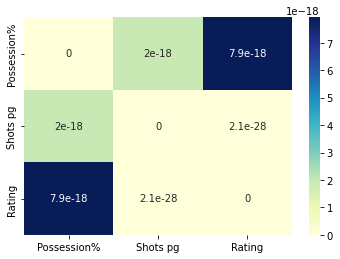

In [33]:
sns.heatmap(p_spearman_3_df,annot=True, cmap="YlGnBu")

In [29]:
variables_attributes=["Possession%", "Shots pg","Rating"]

In [30]:
for i in range(3):
    for j in range(3):
        if i != j :
            p_3_attr = p_spearman_3_df.iloc[i,j]
            if p_3_attr > 0.05:
                print(variables_attributes[i]," vs ",variables_attributes[j],
                      ': Attributes Not Correlated')
            else:
                print(variables_attributes[i]," vs ",variables_attributes[j],
                      ': Attributes Correlated')

Possession%  vs  Shots pg : Attributes Correlated
Possession%  vs  Rating : Attributes Correlated
Shots pg  vs  Possession% : Attributes Correlated
Shots pg  vs  Rating : Attributes Correlated
Rating  vs  Possession% : Attributes Correlated
Rating  vs  Shots pg : Attributes Correlated


But as a correlation matrix we need only look for: <br>
Possession%  vs  Shots pg : Attributes Correlated <br>
Possession%  vs  Rating : Attributes Correlated <br>
Shots pg  vs  Rating : Attributes Correlated <br>

<AxesSubplot:>

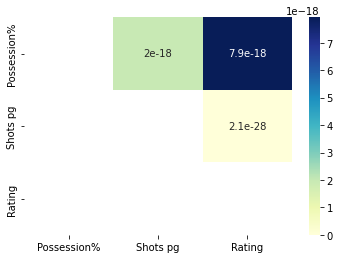

In [58]:
mask = np.tri(p_spearman_3_df.shape[0], k=0)
sns.heatmap(p_spearman_3_df,annot=True, cmap="YlGnBu",mask=mask)

As the P-Value of the correlation matrix the 3 features are correlated. 
